#### Metode i primjena vjestacke inteligencije
#### Laboratorijska vjezba 7
#### Student: Masovic Haris
#### Index: 1689/17993

## 0. Dependencies

In [1]:
import sys

!{sys.executable} -m pip install matplotlib Image

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


## 2. Dataset: Dogs vs Cats dataset

### 2.1 Organizacija podataka

In [2]:
import os, shutil

# dataset was uncompressed
original_dataset_dir = './original/'

# The directory where we will
# store our smaller dataset
base_dir = './downsized/'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

original_train_dir = os.path.join(original_dataset_dir, 'train')

#### CATS #####
## Original/train/cats(0-999) -> downsized/train/cats
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

## Original/train/cats(1000-1499) -> downsized/validation/cats
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
## Original/train/cats(1500-1999) -> downsized/test/cats    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#### DOGS #####    
## Original/train/dogs(0-999) -> downsized/train/dogs
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
## Original/train/dogs(1000-1499) -> downsized/train/dogs    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

## Original/train/dogs(1500-1999) -> downsized/train/dogs        
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

#### 2.1.1 Da li su rezolucije slika u dataset-u iste?

In [44]:
from PIL import Image 

# cats
cat_image_resolutions = []
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    file = os.path.join(train_cats_dir, fname)
    image = Image.open(file)
    cat_image_resolutions.append(image.size)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    file = os.path.join(validation_cats_dir, fname)
    image = Image.open(file)
    cat_image_resolutions.append(image.size)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    file = os.path.join(test_cats_dir, fname)
    image = Image.open(file)
    cat_image_resolutions.append(image.size)

# dogs
dog_image_resolutions = []
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    file = os.path.join(train_dogs_dir, fname)
    image = Image.open(file)
    dog_image_resolutions.append(image.size)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    file = os.path.join(validation_dogs_dir, fname)
    image = Image.open(file)
    dog_image_resolutions.append(image.size)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    file = os.path.join(test_dogs_dir, fname)
    image = Image.open(file)
    dog_image_resolutions.append(image.size)

# using a set with length to check if the values are the same    
unique_cat_image_sizes = len(set(cat_image_resolutions))
unique_dog_image_sizes = len(set(dog_image_resolutions))

print(*['Number of different cat image resolutions:', unique_cat_image_sizes])
print(*['Number of different dog image resolutions:', unique_dog_image_sizes])
print(*['Rezolucije u dataset-u', 'jesu' if (unique_cat_image_sizes == 1 and unique_dog_image_sizes == 1) else 'nisu', 'iste.'])

Number of different cat image resolutions: 1095
Number of different dog image resolutions: 1178
Rezolucije u dataset-u nisu iste.


#### 2.1.2 Ako ne, koja je najmanja, a koja najveca slika u dataset-u? Kako ce moguca heterogenost podataka uticati na tacnost?

- Najmanja i najveca slika u datasetu tj. njihove rezolucije su prikazane ispod kroz kod.
- Heterogenost podataka ce uticati tako sto ce se za klasifikaciju morati promijeniti dimenzije pocetnog dataset-a, shodno time moguci su gubici po pitanju samih pixela slika kako bi se zadovoljilo treniranje klasifikatora. Prije treniranja sve slike moraju istu dimenziju.

In [45]:
import numpy as np
import math 

min_sum = math.inf
max_sum = 0

min_x = 0
min_y = 0

max_x = 0
max_y = 0

for cat in cat_image_resolutions:
    x_value = cat[0]
    y_value = cat[1]
    
    tmp_res = x_value + y_value
    
    if tmp_res > max_sum:
        max_sum = tmp_res
        max_x = x_value
        max_y = y_value
    
    if tmp_res < min_sum:
        min_sum = tmp_res
        min_x = x_value
        min_y = y_value

for dog in dog_image_resolutions:
    x_value = dog[0]
    y_value = dog[1]
    
    tmp_res = x_value + y_value
    
    if tmp_res > max_sum:
        max_sum = tmp_res
        max_x = x_value
        max_y = y_value
    
    if tmp_res < min_sum:
        min_sum = tmp_res
        min_x = x_value
        min_y = y_value
    
print(*['Najmanja rezolucija: {0}x{1}'.format(min_x, min_y), 'a najveca rezolucija: {0}x{1}'.format(max_x, max_y)])

Najmanja rezolucija: 59x45 a najveca rezolucija: 1023x768


## 3. Definisanje neuronske mreze

In [5]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### 3.0.1 Objasnite koje vrste slojeva koristimo u ovom primjeru? Objasnite i sve upotrebljene parametre. Koristite se Keras dokumentacijom za pronalazenje informacija.

Koristimo sljedece vrste slojeva:
1. `Conv2D` - ovo predstavlja dvodimenzionalni konvolucijski sloj koji na izlazu daje tensor kao rezultat konvolucije kernela sa ulaznim slojem. Koristeni parametri su:
    - `filters` - parametar koji predstavlja dimenzionalnost izlaza.
    - `kernel_size` - parametar koji je tipa `tuple` i koji predstavlja visinu i sirinu konvolucijskog prozora. Ako je samo jedna vrijednost, onda oba parametra imaju tu vrijednost.
    - `activation` - parametar koji predstavlja funkciju aktivacije.
    - `input_shape` - parametar koji predstavlja koji tip podataka se koristi, odnosno informacije o slici, rezoluciji i broju kanala slike. Npr `(150, 150, 3)` oznaca da je slika rezolucije `150x150` koja je `RGB` tj. ima 3 kanala.
2. `MaxPooling2D` - sloj koji se koristi za max pooling podataka koji su spremljeni. Max pooling je proces koji pokusava smanjiti reprezentaciju ulaznih podataka smanjivajuci dimenzionalnost i donoseci pretpostavke o znacajkama koje se nalaze u nekim specificim regijama. Za ovaj sloj se koristi `pool_size` parametar i ovaj parametar predstavlja delta parametar, odnosno za ove velicine se smanjuju ulazne dimenzije vertikalno i horizontalno.
3. `Dense` - dense sloj na svom izlazu daje rezultat po vec poznatoj funkciji `output = activation(dot(input, kernel) + bias)`. Vec je koristen i koristi `units` parametar kao specifikator velicine izlaza i `activation` parametar za odredjivanje aktivacijske funkcije.
4. `Flatten` - sloj zaduzen da poravna mapu znacajki u jednu kolonu.

#### 3.0.2 Zatim objasnite sve transformacije podataka (u smislu dimenzijalnosti) od ulaza do izlaza iz mreze. Primjer: koje dimenzije je slika u prvom sloju, koja u drugom, itd.

- Polazna velicina je `150x150`, dimenzije slika se smanjuju kroz slojeve, dok se dubina informacija o znacajkama povecava kroz slojeve.
- Nakon prvog sloja, dimenzije slika su `148x148`, dok je dubina `32`.
- Nakon drugog sloja, dimenzije slika su `74x74`, dok je dubina `32`.
- Nakon treceg sloja, dimenzije slika su `72x72`, dok je dubina `64`.
- Nakon cetvrtog sloja, dimenzije slika su `36x36`, dok je dubina `64`.
- Nakon petog sloja, dimenzije slika su `34x34`, dok je dubina `128`.
- Nakon sestog sloja, dimenzije slika su `17x17`, dok je dubina `128`.
- Nakon sedmog sloja, dimenzije slika su `15x15`, dok je dubina `128`.
- Nakon osmog sloja, dimenzije slika su `7x7`, dok je dubina `128`.
- Nakon ovog koristi se `flatten` sloj koji je zaduzen da poravna dimenzionalnost i jedan `dense` sloj sa dimenziolanoscu `512` i nakon toga jos jedan `dense` sloj sa binarnom vrijednoscu.

#### 3.0.3 Po definisanju mreze koristiti naredbu `model.summary()` da ispisete sve informacije o izlazima i broju parametara, a onda za svaki nivo tacno odredite kako se doslo do tih informacija. Koristite se informacijama datim na predavanjima.

- Prikaz naredbe je dat ispod.
- Za `2d` konvolucione slojeve, broj parametara se racuna pomocu formule `filters * (broj_kanala * kernel_size + 1)`.
- Tako da za prvi `conv2d` sloj imamo `32 * (3 * (3*3) + 1) = 896`.
- Pomocu iste formule dobijamo i za sljedece `conv2d` slojeve respektivno:
    - `64 * (32 * (3 * 3) + 1) = 18496`
    - `128 * (64 * (3 * 3) + 1) = 73856`
    - `128 * (128 * (3 * 3) + 1) = 147584`
- Za `MaxPooling2D` nema parametara (0), vec se racuna samo odredjeni broj.
- Za `flatten` nema parametara isto tj. 0 je.
- Za `dense` slojeve, broj parametara se racuna kao `dimenzija_izlaza * (dimenzija_ulaza + 1)`, shodno tome imamo:
    - `512 * (6272 + 1) = 3211776`
    - `1 * (512 + 1) = 513`

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### 3.1 Podesavanje modela za treniranje

#### 3.1.1 Napisati kod koji ce podesiti model za fazu treniranja

In [6]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

### 3.2 Priprema podataka

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# varijable su definisane datim kodom na pocetku
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

data_batch = []
labels_batch = []

for data_batch, labels_batch in train_generator:
    data_batch = data_batch
    labels_batch = labels_batch
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


#### 3.2.1 Objasnite zasto u ovom primjeru koristimo `ImageDataGenerator` i kako se koristi.

- Posto pocetni oblik podata ne odgovara ulaznom formatu nase mreze, mora se njihov format izmijeniti. Zbog toga koristimo `ImageDataGenerator`. Ovaj generator ima mogucnost automatskog pretvaranja slika u serije vec obradjenih tenzora i na taj nacin omogucava pripremu podataka na ulaz u mrezu.

#### 3.2.2 Objasnite kako se ovaj generator primijenjuje na slike iz skupa za treniranje i validaciju?

- Slike koje se nalaze u direktorijima `train_dir` i `validation_dir` se prvo procitaju, zatim se pretvore u `JPEG` format u `RGB` matricu pixela. Nakon toga se ovi pixeli pretvaraju u tenzore u formatu pomicnog zareza, te se skaliraju da imaju vrijednost u segmentu `[0, 1]`. Ovaj generator kao izlaz daje `RGB` slike koje imaju dimenziju `150x150` i skup labela koje ce imati oblik `(20,)`

#### 3.2.5 Koristeci istu strukturu kao pod 4, isprintajte sadrzaj 0 i 1 slike u ovom batch-u. Kako su podaci predstavljeni i kojoj klasi pripadaju?

- Slike su predstavljene nizovima koji imaju `float` vrijednosti u segmentu `[0, 1]`. 
- Prikaz podataka je dat ispod.

In [17]:
print(*['Podaci:', data_batch[0], 'slika 0 pripada klasi:', labels_batch[0]])
print(*['Podaci:', data_batch[1], 'slika 1 pripada klasi:', labels_batch[1]])

Podaci: [[[0.20392159 0.24705884 0.25490198]
  [0.18823531 0.23137257 0.2392157 ]
  [0.18431373 0.227451   0.23529413]
  ...
  [0.3372549  0.4156863  0.41960788]
  [0.26666668 0.3372549  0.34509805]
  [0.37647063 0.44705886 0.454902  ]]

 [[0.19215688 0.23529413 0.24313727]
  [0.19215688 0.23529413 0.24313727]
  [0.19607845 0.2392157  0.24705884]
  ...
  [0.30980393 0.38823533 0.3921569 ]
  [0.37254903 0.4431373  0.45098042]
  [0.33333334 0.3921569  0.4039216 ]]

 [[0.18823531 0.23137257 0.24705884]
  [0.19607845 0.2392157  0.25490198]
  [0.20000002 0.24313727 0.25882354]
  ...
  [0.29803923 0.36862746 0.37647063]
  [0.32156864 0.3921569  0.40000004]
  [0.34117648 0.40000004 0.41176474]]

 ...

 [[0.28235295 0.3647059  0.43137258]
  [0.40000004 0.47450984 0.5411765 ]
  [0.4039216  0.47058827 0.53333336]
  ...
  [0.2392157  0.27450982 0.27058825]
  [0.21960786 0.24313727 0.24313727]
  [0.23137257 0.25490198 0.25490198]]

 [[0.3019608  0.38823533 0.4431373 ]
  [0.2901961  0.35686275 0.41

### 3.3 Treniranje mreze

In [9]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 30s 295ms/step - loss: 0.6891 - accuracy: 0.5385 - val_loss: 0.6781 - val_accuracy: 0.5760
Epoch 2/30
100/100 [==============================] - 37s 367ms/step - loss: 0.6554 - accuracy: 0.6015 - val_loss: 0.6413 - val_accuracy: 0.6280
Epoch 3/30
100/100 [==============================] - 31s 310ms/step - loss: 0.6192 - accuracy: 0.6585 - val_loss: 0.6117 - val_accuracy: 0.6570
Epoch 4/30
100/100 [==============================] - 30s 301ms/step - loss: 0.5751 - accuracy: 0.6945 - val_loss: 0.5934 - val_accuracy: 0.6700
Epoch 5/30
100/100 [==============================] - 30s 302ms/step - loss: 0.5343 - accuracy: 0.7325 - val_loss: 0.5866 - val_accuracy: 0.6930
Epoch 6/30
100/100 [==============================] - 30s 301ms/step - loss: 0.5140 - accuracy: 0.7440 - val_loss: 0.5765 - val_accuracy: 0.6850
Epoch 7/30
100/100 [==============================] - 

#### 3.3.1 Objasnite sve parametre koji se koriste u fit generator.

Parametri su sljedeci:
- `train_generator` - generator koji se proslijedjuje ili instanca Sequence objekta za izbjegavanje duplicirana podataka kod visestrukog procesiranja.
- `steps_per_epoch` - broj koraka koje koristi generator u svkaoj epohi, nakon dostignutog broja, definise se da je epoha zavrsena.
- `epochs` - broj epoha u toku treniranja modela.
- `validation_data` - parametar koji odredjuje podatke za validaciju, moze biti generator ili tuple sa numpy nizovima. Ukoliko je generator definise se `validation_steps` da se zna koliko koraka (odnosno na koliko skupova) treba ogracniti generator.
- `validation_steps` - parametar koji oderedjuje koliko skupova generator za validaciju treba generisati za validaciju.

### 3.4 Prikaz rezultata

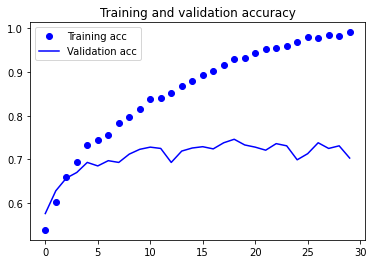

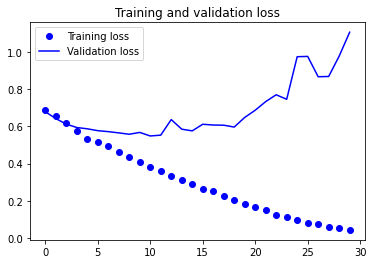

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 3.4.1 Koja je tacnost skupa za treniranje i validaciju? Kako se tacnost mijenja kroz vrijeme (tj. povecanje broja epoha)? Da li su ovi rezultati zadovoljavajuci?

- Tacnost skupa za treniranje je: `0.9910`, dok tacnost za validaciju je: `0.7030`.
- Tacnost za treniranje se povecava kroz vrijeme, dok tacnost za validaciju varira izmedju `67%` i `72%`.
- Ovi rezultati nisu zadovoljavajuci, jer prikazaju overfitting, te treba smanjiti broj epoha.

#### 3.4.3 U prvoj epohi vrijednost funkcije gubitka (loss) iznosi oko 0.69. Da li je to ocekivanja vrijednosti? Zasto?

- Vrijednost funkcije gubitka u prvoj epohi je approx jednaka `ln(broj_klasa)`, posto imamo 2 klase, ocekivana je vrijednost oko `0.69`. U nasoj prvoj epohi vrijednost funkcije gubitka je `0.6781` shodno time to je ocekivana vrijednost.

## 4. Upotreba regularizacije: data augmentation

### 4.1 Osnovni primjer

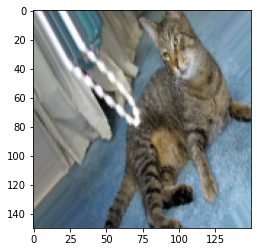

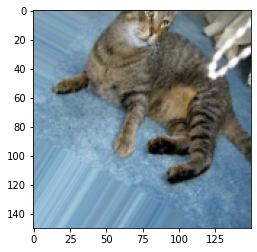

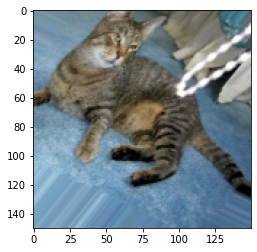

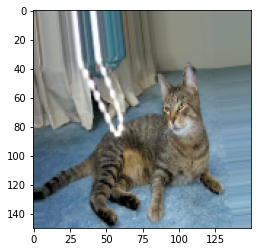

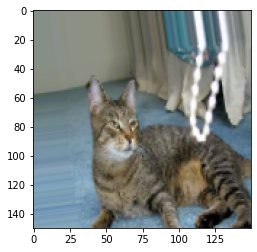

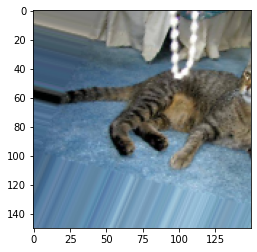

In [36]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
import os, shutil

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

train_cats_dir = 'downsized/train/cats'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to ‘break‘ the loop at some point!
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break

plt.show()

#### 4.1.2 Objasnite promjene koje nastaju na slikama (na osnovu nekih primjera).

- Mozemo primijetiti da su slike rotirane nekoliko puta sa razlicitim stepenima rotacije.
- Takodjer mozemo primijetiti da nastaje slika okretanjem izvorne slike horizontalno ili vertikalno bilo po duzini ili sirinu.
- Takodjer mozemo primijetiti da su odredjeni dijelovi slike mutni, ti dijelovi predstavljaju novonastale pixele nakon transformacije koji su bili popunjeni pomocu definisane strategije popunjavanja koja je specificirana kroz parametar `fill_mode`.

#### 4.1.3 Prikazite nekoliko slika nakon transformacije.

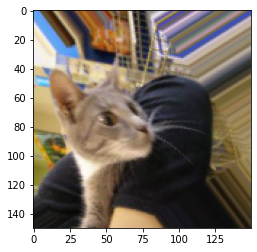

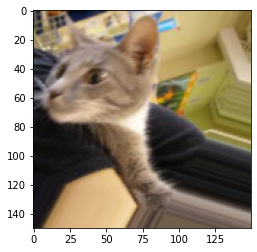

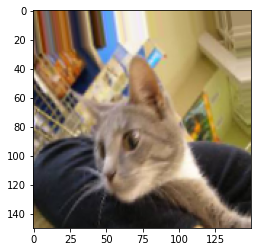

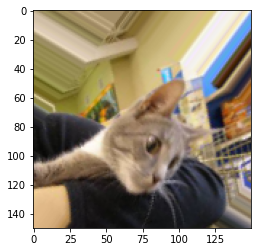

In [33]:
# We pick one image to "augment"
img_path = fnames[5]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to ‘break‘ the loop at some point!
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

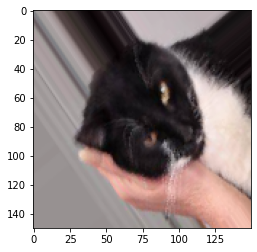

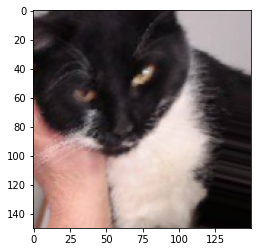

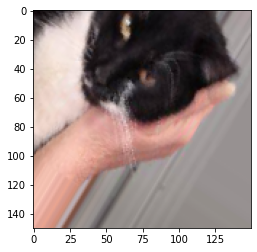

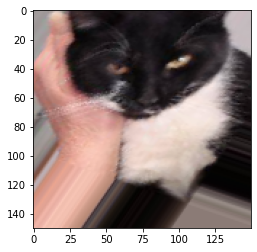

In [34]:
# We pick one image to "augment"
img_path = fnames[10]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to ‘break‘ the loop at some point!
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### 4.2 Treniranje mreze sa generatorima za augmentaciju

- Smanjen je batch size na `20`.

In [46]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 28s 282ms/step - loss: 0.5143 - accuracy: 0.7470 - val_loss: 0.5163 - val_accuracy: 0.7520
Epoch 2/100
100/100 [==============================] - 31s 307ms/step - loss: 0.5110 - accuracy: 0.7440 - val_loss: 0.5156 - val_accuracy: 0.7380
Epoch 3/100
100/100 [==============================] - 31s 308ms/step - loss: 0.5133 - accuracy: 0.7445 - val_loss: 0.5117 - val_accuracy: 0.7410
Epoch 4/100
100/100 [==============================] - 30s 304ms/step - loss: 0.5083 - accuracy: 0.7530 - val_loss: 0.4857 - val_accuracy: 0.7770
Epoch 5/100
100/100 [==============================] - 30s 295ms/step - loss: 0.4991 - accuracy: 0.7530 - val_loss: 0.4754 - val_accuracy: 0.7670
Epoch 6/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4971 - accuracy: 0.7685 - val_loss: 0.5459 - val_accuracy: 0.7160
Epoch 7/100
100/100 [===================

100/100 [==============================] - 29s 289ms/step - loss: 0.4093 - accuracy: 0.8170 - val_loss: 0.4908 - val_accuracy: 0.7860
Epoch 57/100
100/100 [==============================] - 29s 289ms/step - loss: 0.4129 - accuracy: 0.8155 - val_loss: 0.4256 - val_accuracy: 0.7990
Epoch 58/100
100/100 [==============================] - 29s 290ms/step - loss: 0.4108 - accuracy: 0.8080 - val_loss: 0.5084 - val_accuracy: 0.7730
Epoch 59/100
100/100 [==============================] - 29s 291ms/step - loss: 0.3861 - accuracy: 0.8240 - val_loss: 0.4198 - val_accuracy: 0.8190
Epoch 60/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4046 - accuracy: 0.8160 - val_loss: 0.4246 - val_accuracy: 0.8190
Epoch 61/100
100/100 [==============================] - 29s 289ms/step - loss: 0.4028 - accuracy: 0.8235 - val_loss: 0.4177 - val_accuracy: 0.8180
Epoch 62/100
100/100 [==============================] - 29s 291ms/step - loss: 0.3813 - accuracy: 0.8300 - val_loss: 0.4138 - val_a

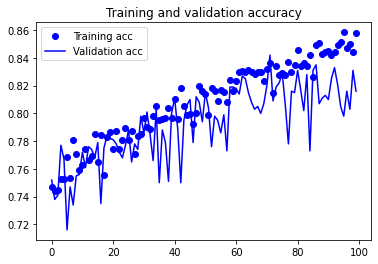

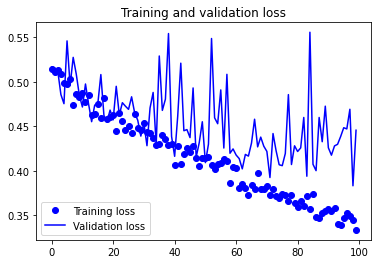

In [47]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 28s 284ms/step - loss: 0.6937 - accuracy: 0.5255 - val_loss: 0.6849 - val_accuracy: 0.5960
Epoch 2/100
100/100 [==============================] - 29s 287ms/step - loss: 0.6873 - accuracy: 0.5520 - val_loss: 0.6799 - val_accuracy: 0.5170
Epoch 3/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6780 - accuracy: 0.5645 - val_loss: 0.6595 - val_accuracy: 0.6010
Epoch 4/100
100/100 [==============================] - 29s 290ms/step - loss: 0.6561 - accuracy: 0.6040 - val_loss: 0.6436 - val_accuracy: 0.6020
Epoch 5/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6386 - accuracy: 0.6330 - val_loss: 0.6199 - val_accuracy: 0.6360
Epoch 6/100
100/100 [==============================] - 29s 290ms/step - loss: 0.6249 - accuracy: 0.6420 - val_loss: 0.5997 - val_accuracy: 0.6660
Epoch 7/100
100/100 [==============================] - 29s 290ms/step - loss: 0.6249 - accuracy: 0.6525 - val_loss: 0.6185 -

Epoch 57/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4618 - accuracy: 0.7795 - val_loss: 0.4944 - val_accuracy: 0.7620
Epoch 58/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4550 - accuracy: 0.7875 - val_loss: 0.4584 - val_accuracy: 0.7890
Epoch 59/100
100/100 [==============================] - 29s 291ms/step - loss: 0.4485 - accuracy: 0.7825 - val_loss: 0.4491 - val_accuracy: 0.8010
Epoch 60/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4499 - accuracy: 0.7920 - val_loss: 0.4515 - val_accuracy: 0.7920
Epoch 61/100
100/100 [==============================] - 29s 291ms/step - loss: 0.4500 - accuracy: 0.7965 - val_loss: 0.5343 - val_accuracy: 0.7460
Epoch 62/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4419 - accuracy: 0.7905 - val_loss: 0.4817 - val_accuracy: 0.7640
Epoch 63/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4479 - accuracy: 0.7985 - val_loss: 0

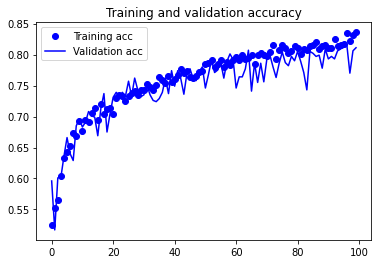

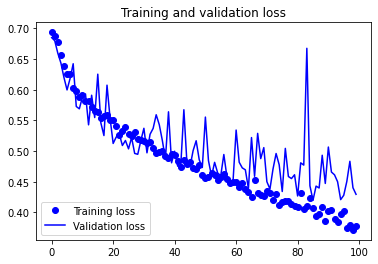

In [49]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 4.2.1 Da li se skup za validaciju i testiranje treba augmentirati? Zasto?

- Skupovi za validaciju i testiranje ne treba augmentirati, jer se oni koristi za mjerenje tacnosti i predikciju (validacijski dataset) modela. 
- Augmentiranje treba koristi samo nad skupom za testiranje jer na taj nacin povecavamo kolicinu podataka nad kojim se trenira model. 
- Validacija takvog modela treba biti odradjena nad podacima koji su reprezentativni primjer stvarnih podataka, shodno time ne treba generisati dodatne podatke.

#### 4.2.2 Prikazite grafike tacnosti i funkcije gubitka prije i poslije Dropout-a i prokomentarisite rezultate.

- Iznad su prikazani trazeni grafovi prije i poslije Dropout-a.
- Vidimo da nakon dodavanja droput-a, krive koje opisuju validacijsku tacnost blisko prate tacke koje opisuju tacnost trening-a, sto znaci smanjen je overfitting uz pomoc augmentacije podataka.